In [1]:
# data preprocess
from keras.datasets import mnist
import numpy as np

(train_features, _), (test_features, _) = mnist.load_data()  # labels is not used in autoencoder model
train_features = train_features / 255  # normalize values between 0 ~ 1
test_features = test_features / 255
train_features = train_features.reshape((train_features.shape[0], -1))  # reshape to new shape(data_length, 784)
test_features = test_features.reshape((test_features.shape[0], -1))
print(train_features.shape)
print(test_features.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [2]:
# build the simplest autoencoder model
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  # compress 784 dim into 32 dim
# input layer
input_img = Input(shape=(784, ))  # 784 dim input placeholder
# encoder layer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# decoder layer
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)

# construct the encoder model
encoder = Model(inputs=input_img, outputs=encoded)

# define optimizer and loss
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])  # display accuracy in training process

In [3]:
# train autoencoder model
autoencoder.fit(x=train_features,
                y=train_features,
                epochs=20,
                batch_size=300,
                shuffle=True,
                validation_data=(test_features, test_features))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2961 - acc: 0.7950 - val_loss: 0.2632 - val_acc: 0.8014
Epoch 2/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2573 - acc: 0.8020 - val_loss: 0.2473 - val_acc: 0.7965
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2426 - acc: 0.7974 - val_loss: 0.2363 - val_acc: 0.7957
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2277 - acc: 0.7971 - val_loss: 0.2176 - val_acc: 0.7965
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2106 - acc: 0.7968 - val_loss: 0.2003 - val_acc: 0.7974
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1949 - acc: 0.7990 - val_loss: 0.1866 - val_acc: 0.8003
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1826 - acc: 0.8011 - val_loss: 0.1777 - val_acc

In [4]:
# using test images to encode and decode some digits
decoded_imgs = autoencoder.predict(test_features)

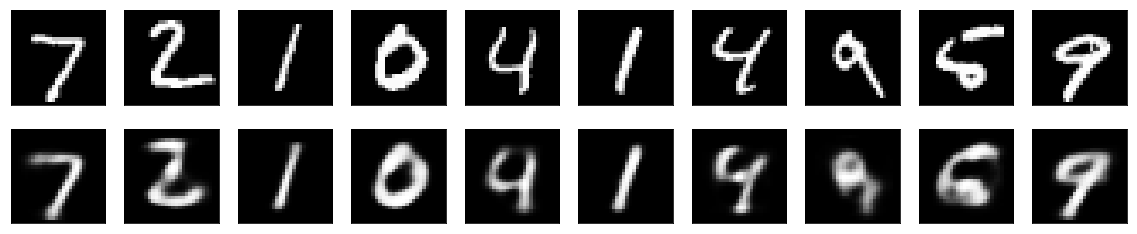

In [5]:
# visualize the reconstructed digits
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original digits
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_features[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed digits
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()